In [25]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from model import CSRNet
import numpy as np
import cv2
from matplotlib import cm as c
from matplotlib import pyplot as plt

In [26]:
# Load the model
model = CSRNet()
model = model.cuda()
checkpoint = torch.load('partBmodel_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

/home/omar/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [27]:
model.eval()

CSRNet(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert to tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],   # Normalize pixel values
        std=[0.229, 0.224, 0.225]
    )
])

In [228]:
image_path = 'ext_testing/348585450_792028252197064_682637079987460414_n.jpg'
img = Image.open(image_path).convert('RGB')
input_image = transform(img).unsqueeze(0).cuda()

with torch.no_grad():
    output = model(input_image)

count = output.cpu().sum().item()

Predicted Count :  62


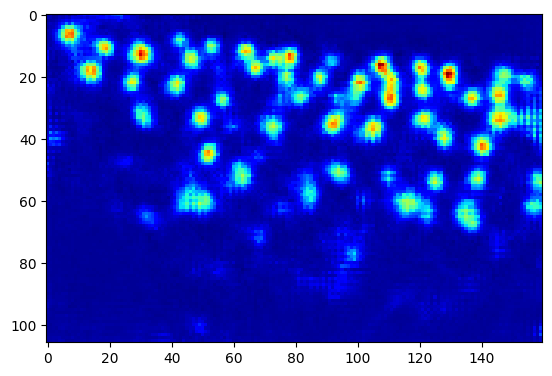

Original Image


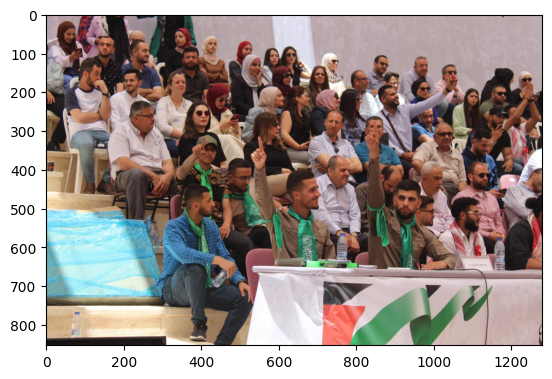

Overlay


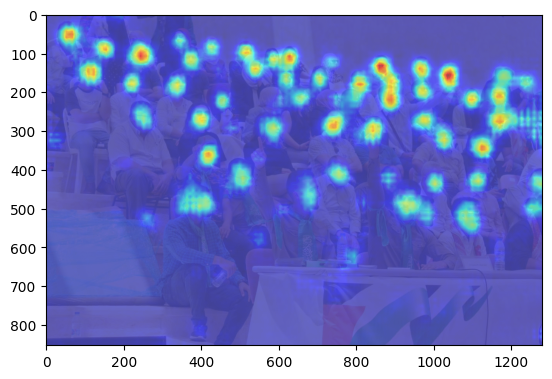

In [240]:
print("Predicted Count : ", int(count))
heatmap = np.asarray(output.cpu().reshape(
    output.cpu().shape[2], output.cpu().shape[3]))
plt.imshow(heatmap, cmap=c.jet)
plt.show()

print("Original Image")
plt.imshow(plt.imread(image_path))
plt.show()

alpha = 0.6
resized_heatmap = cv2.resize(
    heatmap, (input_image.shape[3], input_image.shape[2]))
print("Overlay")
plt.imshow(plt.imread(image_path), alpha=1-alpha)
plt.imshow(resized_heatmap, cmap=c.jet, alpha=alpha)
plt.show()

Predicted Count :  62


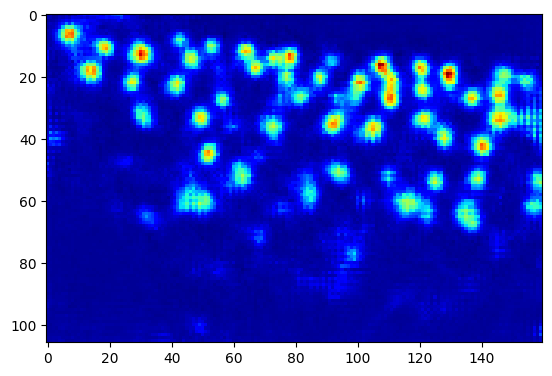

Original Image


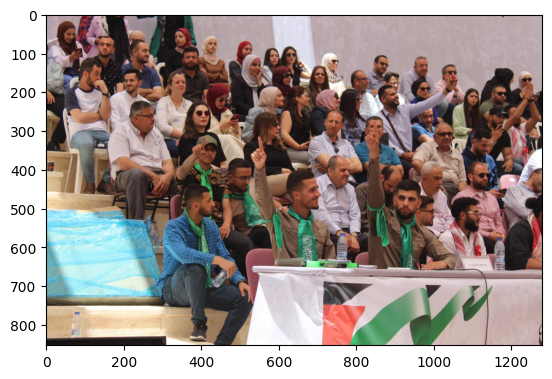

Overlay


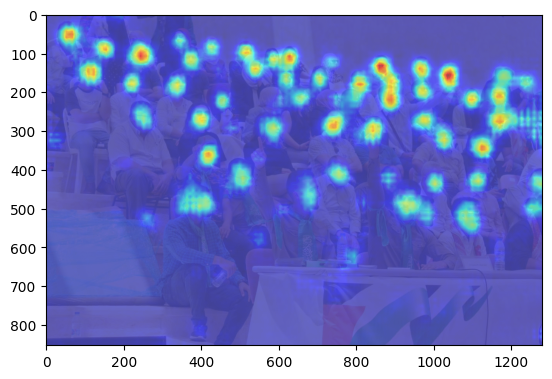

In [ ]:
print("Predicted Count : ", int(count))
heatmap = np.asarray(output.cpu().reshape(
    output.cpu().shape[2], output.cpu().shape[3]))
plt.imshow(heatmap, cmap=c.jet)
plt.show()

print("Original Image")
plt.imshow(plt.imread(image_path))
plt.show()

alpha = 0.6
resized_heatmap = cv2.resize(
    heatmap, (input_image.shape[3], input_image.shape[2]))
print("Overlay")
plt.imshow(plt.imread(image_path), alpha=1-alpha)
plt.imshow(resized_heatmap, cmap=c.jet, alpha=alpha)
plt.show()

In [12]:
# output_array = output.cpu().numpy()
# mean = np.array([0.485, 0.456, 0.406]).reshape((1, 3, 1, 1))
# std = np.array([0.229, 0.224, 0.225]).reshape((1, 3, 1, 1))
# output_array = output_array * std + mean

# # Normalize the output tensor
# normalized_map = cv2.normalize(
#     output_array, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# # Transpose the normalized map
# transposed_map = np.transpose(normalized_map.squeeze(), (1, 2, 0))

# # Resize the density map
# resized_map = cv2.resize(
#     transposed_map, (input_image.shape[3], input_image.shape[2]))

# # Generate the heatmap
# heatmap = cv2.applyColorMap(255 - np.uint8(resized_map * 255), cv2.COLORMAP_JET)

# # Overlay the heatmap on the original image
# # alpha = 0.8  # Adjust the transparency of the heatmap
# # overlay = cv2.addWeighted(input_image, 1 - alpha, heatmap, alpha, 0)

# plt.imshow(heatmap, cmap=c.hot)
# plt.show()